# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

In [2]:
# Loading the dataset
sales_data = pd.read_csv('sales.csv')

In [3]:
# Displaying the first few rows of the dataset to understand its structure and overview
sales_data.head()

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


# Data Pre-processing

In [4]:
# Removing the unnamed column
sales_data = sales_data.drop(columns=['Unnamed: 0'])

In [5]:
# Converting 'Date' to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [9]:
# Checking for missing values
missing_values = sales_data.isnull().sum()
missing_values

Date     0
Sales    0
dtype: int64

In [10]:
# Basic statistics
basic_stats = sales_data.describe()
basic_stats

,Date,Sales
count,365,365.000000
mean,2022-03-31 23:59:59.999999744,34.093942
min,2021-10-01 00:00:00,19.002444
25%,2021-12-31 00:00:00,29.290376
50%,2022-04-01 00:00:00,33.971567
75%,2022-07-01 00:00:00,38.647294
max,2022-09-30 00:00:00,48.190967
std,NaN,6.572683


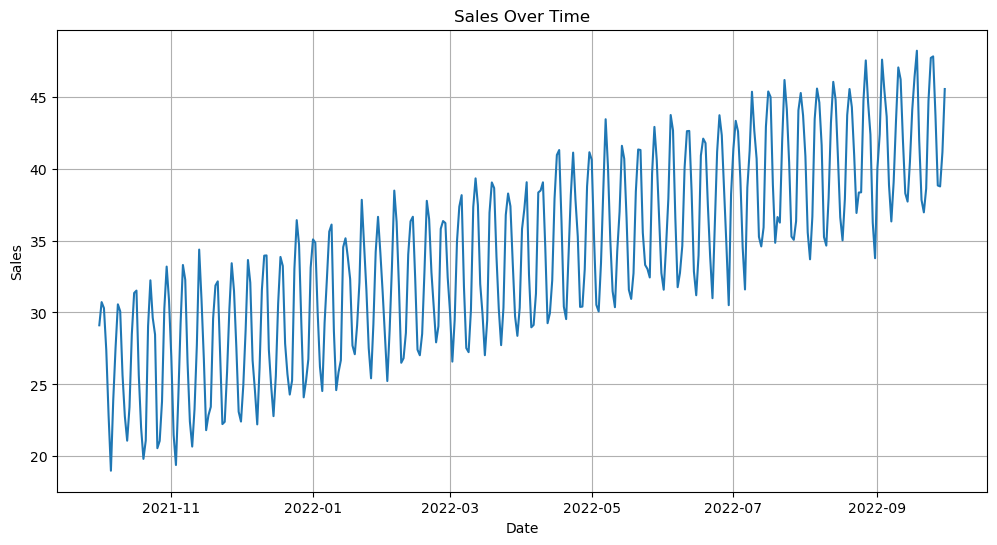

In [11]:
# Plotting sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=sales_data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Time Series Preparation

In [12]:
# Setting the 'Date' column as the index
sales_data.set_index('Date', inplace=True)

In [13]:
# Testing for stationarity of the data
adf_test = adfuller(sales_data['Sales'])

In [14]:
# Seasonal Decomposition
decomposition = seasonal_decompose(sales_data['Sales'], model='additive', period=30) # Assuming monthly seasonality

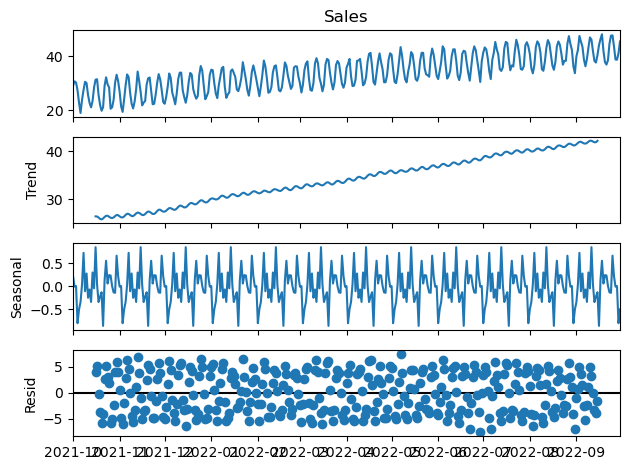

In [15]:
# Plotting decomposition
decomposition.plot()
plt.show()

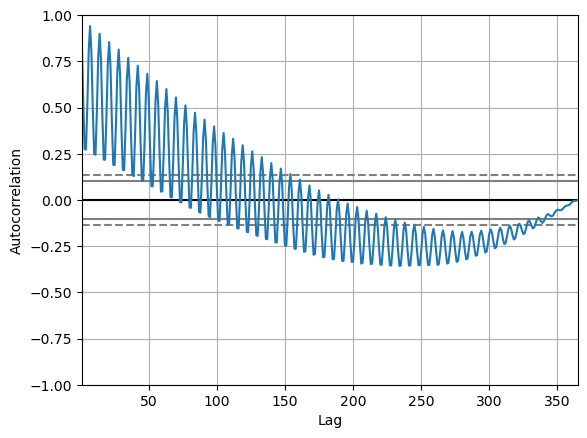

In [16]:
# Autocorrelation plot
autocorrelation_plot(sales_data['Sales'])
plt.show()

In [17]:
# ADF Test Result
adf_test[1] 

0.9791262941384601

In [18]:
# Differencing the series to make it stationary
sales_diff = sales_data['Sales'].diff().dropna()

In [19]:
# Re-testing for stationarity on differenced data
adf_test_diff = adfuller(sales_diff)

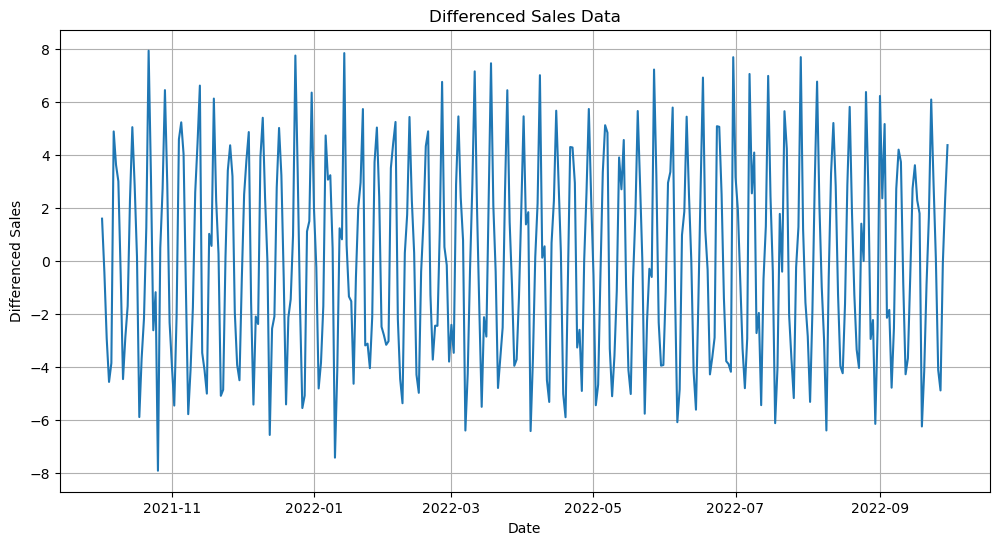

In [20]:
# Plotting the differenced data
plt.figure(figsize=(12, 6))
plt.plot(sales_diff)
plt.title('Differenced Sales Data')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.grid(True)
plt.show()

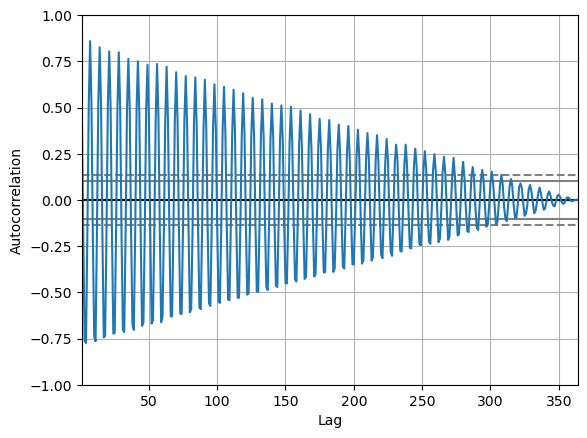

In [21]:
# Autocorrelation plot of the differenced data
autocorrelation_plot(sales_diff)
plt.show()

In [22]:
# ADF Test Result on Differenced Data
adf_test_diff[1]

7.450221855288662e-09

In [23]:
# Fitting an ARIMA model
# I start with an arbitrary choice of p, d, q. 
# Usually, this would be more preferred method based on ACF and PACF plots.
p, d, q = 1, 1, 1  # These are my example parameters
model = ARIMA(sales_data['Sales'], order=(p, d, q))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
# Fit the model
arima_model = model.fit()

In [25]:
# Summary of the model
arima_model_summary = arima_model.summary()
arima_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -940.003
Date:                Sun, 21 Jan 2024   AIC                           1886.005
Time:                        20:40:19   BIC                           1897.697
Sample:                    10-01-2021   HQIC                          1890.652
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2523      0.111      2.281      0.023       0.035       0.469
ma.L1          0.3312      0.108      3.072      0.002       0.120       0.542
sigma2        10.2372      0.835     12.265      0.000       8.601      11.873
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 3.84
Prob(Q):                              0.41   Prob(JB):                         0.15
Heteroskedasticity (H):               1.03   Skew:                             0.20
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
# Splitting the data into training and testing sets
# Let's use the last 30 days as the test set
train = sales_data.iloc[:-30]
test = sales_data.iloc[-30:]

In [28]:
# Train the ARIMA model on the training set
train_model = ARIMA(train, order=(p, d, q))
train_model_fit = train_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
# Forecasting on the testing set
forecast = train_model_fit.forecast(steps=30)
forecast_series = pd.Series(forecast, index=test.index)

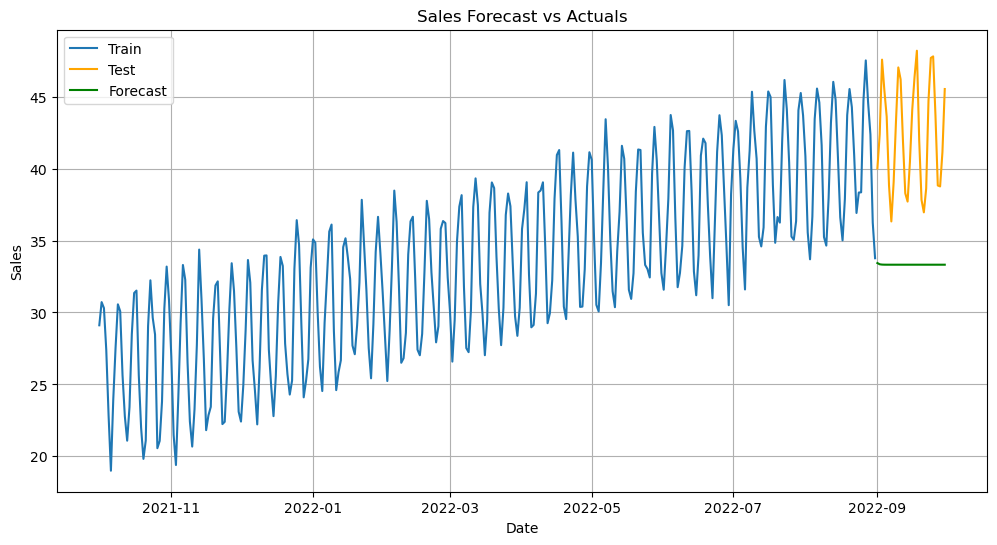

In [30]:
# Plotting the forecasted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.title('Sales Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Evaluating the model
mae = mean_absolute_error(test, forecast_series)
mse = mean_squared_error(test, forecast_series)
rmse = np.sqrt(mse)

mae, mse, rmse

(9.01872222981934, 94.76020419098668, 9.734485306937737)

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

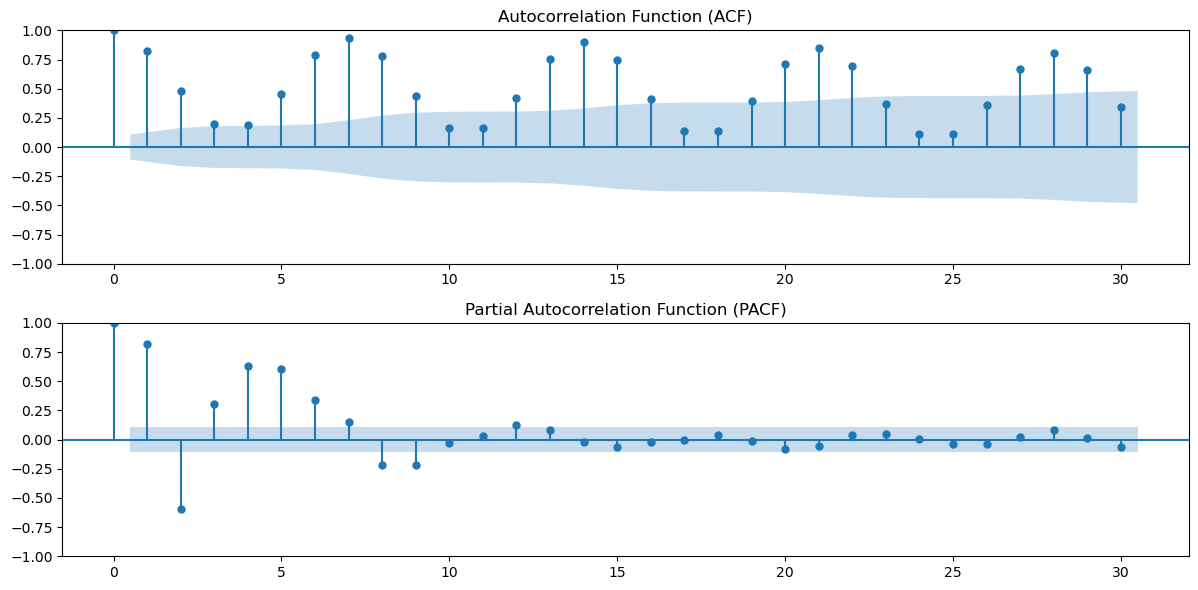

In [33]:
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train['Sales'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.subplot(212)
plot_pacf(train['Sales'], ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [34]:
import itertools

In [35]:
# Define the p, d, and q parameters to take values between 0 and 2
p = d = q = range(0, 3)

In [36]:
# Generating all different combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

In [37]:
# Grid Search Methodlogy
best_aic = float("inf")
best_pdq = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(train, order=param)
        results = temp_model.fit()
        
        # Check if the current model's AIC is lower than the best one so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

best_aic, best_pdq

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

(1188.8294373672484, (2, 1, 2))

In [38]:
# Fitting the ARIMA(2,1,2) model to the training data set
optimized_model = ARIMA(train, order=(2, 1, 2))
optimized_model_fit = optimized_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [39]:
# Forecast using the optimized model
optimized_forecast = optimized_model_fit.forecast(steps=30)
optimized_forecast_series = pd.Series(optimized_forecast, index=test.index)

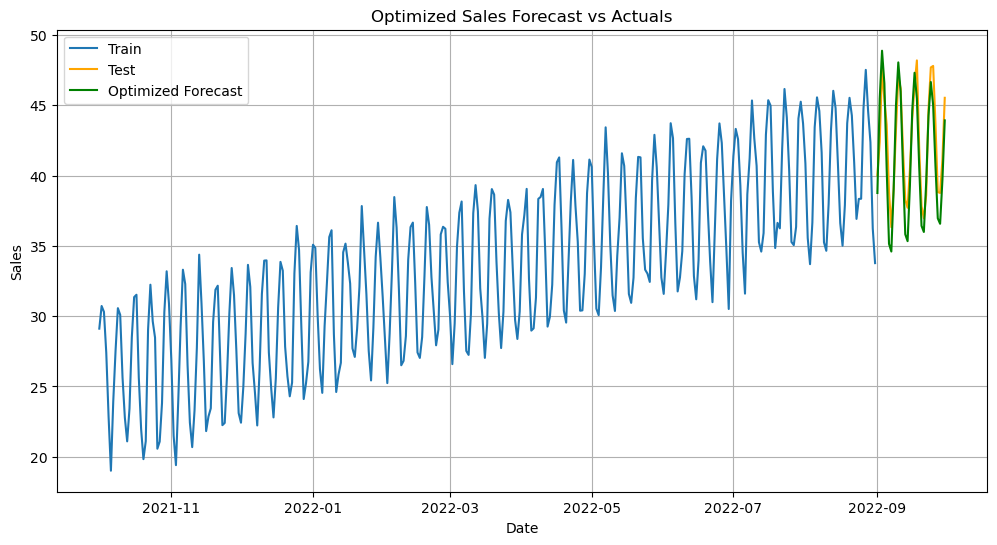

In [40]:
# Plotting the optimized forecast values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test', color='orange')
plt.plot(optimized_forecast_series.index, optimized_forecast_series, label='Optimized Forecast', color='green')
plt.title('Optimized Sales Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Evaluating the optimized model
optimized_mae = mean_absolute_error(test, optimized_forecast_series)
optimized_mse = mean_squared_error(test, optimized_forecast_series)
optimized_rmse = np.sqrt(optimized_mse)

optimized_mae, optimized_mse, optimized_rmse

(1.632352502577951, 3.5009241698216425, 1.871075671858742)

In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [43]:
# Extracting residuals from the optimized model
residuals = optimized_model_fit.resid

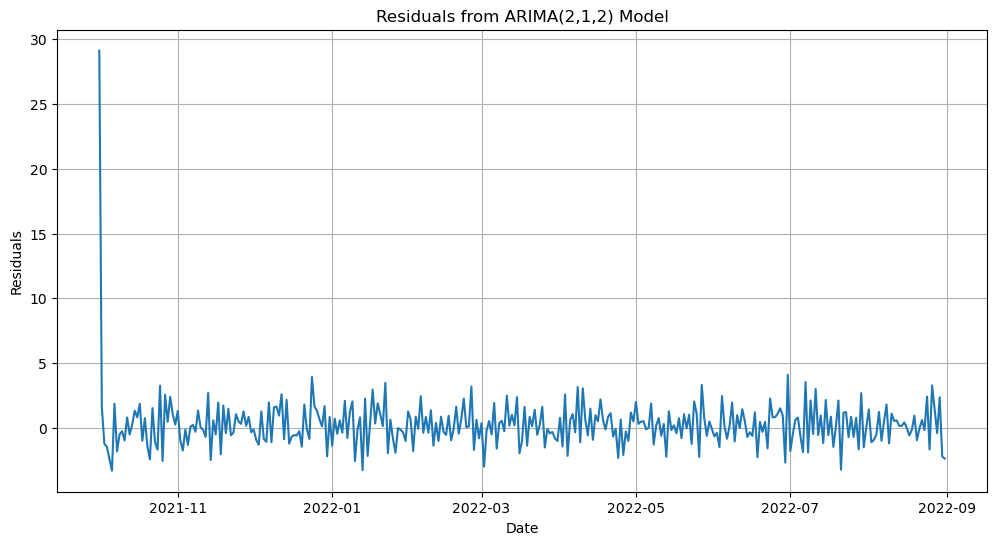

In [44]:
# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA(2,1,2) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [46]:
# Description of Residuals
residuals_description = residuals.describe()
residuals_description

count    335.000000
mean       0.263268
std        2.112644
min       -3.311211
25%       -0.753881
50%        0.146429
75%        1.064521
max       29.109547
dtype: float64

In [48]:
# Ljung-Box Test for checking randomness in residuals function
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
ljung_box_test

,lb_stat,lb_pvalue
10,15.31727,0.120916


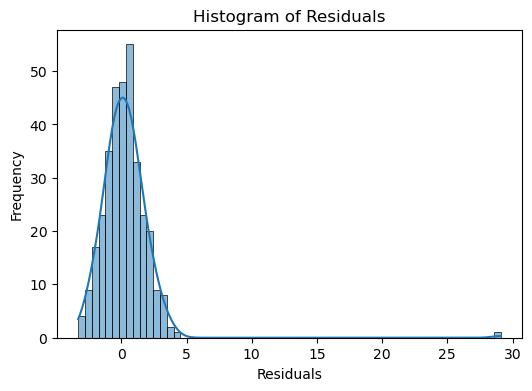

In [49]:
# Histogram of the residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Refitting the ARIMA(2,1,2) model on the complete dataset
full_model = ARIMA(sales_data, order=(2, 1, 2))
full_model_fit = full_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [52]:
# Forecasting for the next 30 days
forecast_period = 30
future_forecast = full_model_fit.forecast(steps=forecast_period)
future_dates = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=forecast_period, freq='D')
future_forecast_series = pd.Series(future_forecast, index=future_dates)

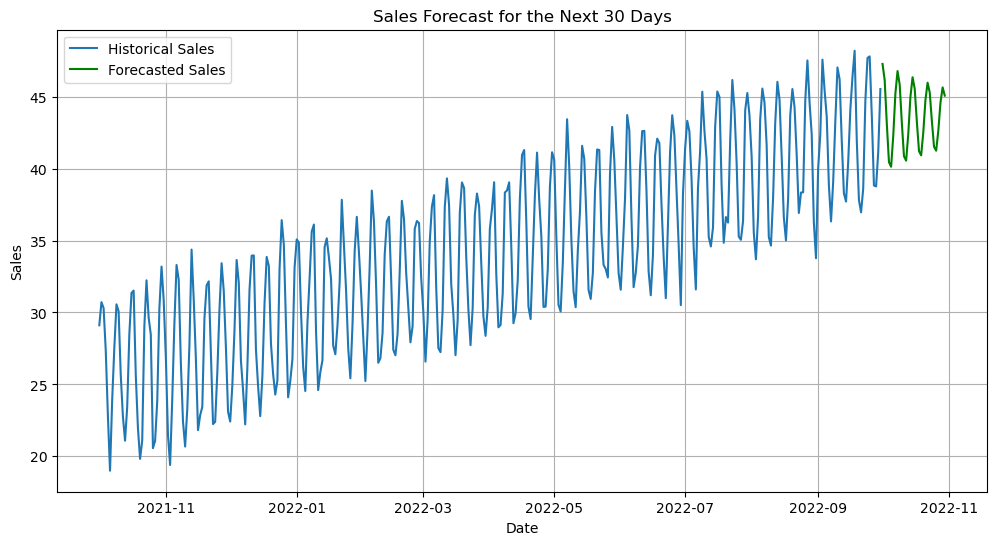

In [53]:
# Plotting the forecasting
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Historical Sales')
plt.plot(future_forecast_series.index, future_forecast_series, label='Forecasted Sales', color='green')
plt.title('Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Forecasted Sales Values
future_forecast_series

2022-10-01    47.273037
2022-10-02    46.152570
2022-10-03    43.104796
2022-10-04    40.449130
2022-10-05    40.126143
2022-10-06    42.283118
2022-10-07    45.235221
2022-10-08    46.777462
2022-10-09    45.828787
2022-10-10    43.184589
2022-10-11    40.858062
2022-10-12    40.550269
2022-10-13    42.409495
2022-10-14    44.982340
2022-10-15    46.346287
2022-10-16    45.543787
2022-10-17    43.249979
2022-10-18    41.212078
2022-10-19    40.920984
2022-10-20    42.523243
2022-10-21    44.765328
2022-10-22    45.971181
2022-10-23    45.292977
2022-10-24    43.303350
2022-10-25    41.518513
2022-10-26    41.244977
2022-10-27    42.625504
2022-10-28    44.579156
2022-10-29    45.644886
2022-10-30    45.072304
Freq: D, Name: predicted_mean, dtype: float64